
График будет отображать зависимость количества химических веществ от количества продуктов косметики.
Смотрим, сколько в исходной таблице строк и столбцов

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('/content/sample_data/chemicals-in-cosmetics.csv')
print('The original database shape:', data.shape) 
data.head()

The original database shape: (112870, 22)


,CDPHId,ProductName,CSFId,CSF,CompanyId,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,SubCategoryId,...,CasNumber,ChemicalId,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount
0,2,ULTRA COLOR RICH EXTRA PLUMP LIPSTICK-ALL SHADES,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),53,...,13463-67-7,6,Titanium dioxide,06/17/2009,08/28/2013,02/01/2011,07/09/2009,07/09/2009,NaN,1
1,3,Glover's Medicated Shampoo,NaN,NaN,338,J. Strickland & Co.,Glover's,18,Hair Care Products (non-coloring),25,...,65996-92-1,4,Distillates (coal tar),07/01/2009,07/01/2009,NaN,07/01/2009,07/01/2009,NaN,2
2,3,Glover's Medicated Shampoo,NaN,NaN,338,J. Strickland & Co.,Glover's,18,Hair Care Products (non-coloring),25,...,140-67-0,5,Estragole,07/01/2009,07/01/2009,NaN,07/02/2009,07/02/2009,NaN,2
3,4,PRECISION GLIMMER EYE LINER-ALL SHADES �,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),46,...,13463-67-7,7,Titanium dioxide,07/09/2009,08/28/2013,NaN,07/09/2009,07/09/2009,NaN,1
4,5,AVON BRILLIANT SHINE LIP GLOSS-ALL SHADES �,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),52,...,13463-67-7,8,Titanium dioxide,07/09/2009,08/28/2013,02/01/2011,07/09/2009,07/09/2009,NaN,1


Убираем дубликаты

In [78]:
data = data.drop_duplicates()
print('The new database shape:', data.shape)

The new database shape: (112616, 22)


Группируем таблицу по столбцу ChemicalCount.

CDPHId связывает по айди один продукт с разными характеристиками, поэтому делаем его уникальным.
 

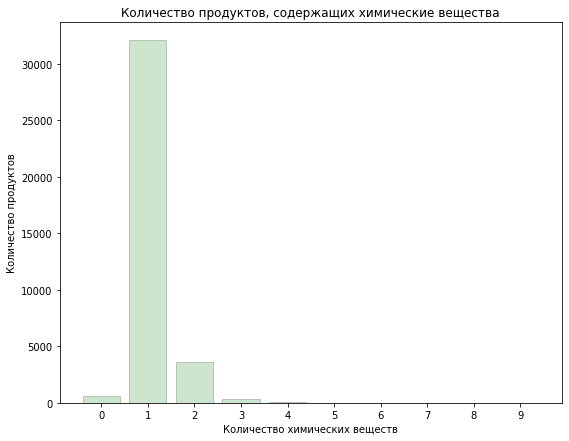

In [ ]:
data2 = data.groupby(['ChemicalCount']).nunique()['CDPHId']

fig = plt.figure(figsize=(9,7))
ax = plt.subplot()

ax.bar(data2.index, data2.values, log=False, align='center', alpha=0.2, color='green', edgecolor='black')
ax.set_xticks(np.arange(0,10))
ax.set(title='Количество продуктов, содержащих химические вещества', xlabel='Количество химических веществ', ylabel='Количество продуктов')

plt.show()

Теперь с библиотекой Seaborn

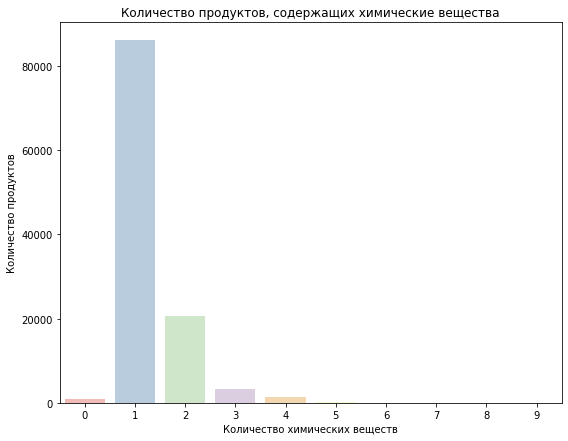

In [ ]:
import seaborn as sns
fig = plt.figure(figsize=(9,7))
ax = plt.subplot()
ax = sns.barplot(x=data['ChemicalCount'].value_counts().index,
            y=data['ChemicalCount'].value_counts(), palette='Pastel1')

ax.set(title = 'Количество продуктов, содержащих химические вещества', xlabel='Количество химических веществ', ylabel='Количество продуктов')
plt.show()

На графиках видно, что в продуктах преобладает содержание одного химического вещества.

Еще один график.
Отображает количество химических веществ, содержащихся в детских продуктах, по названиям.

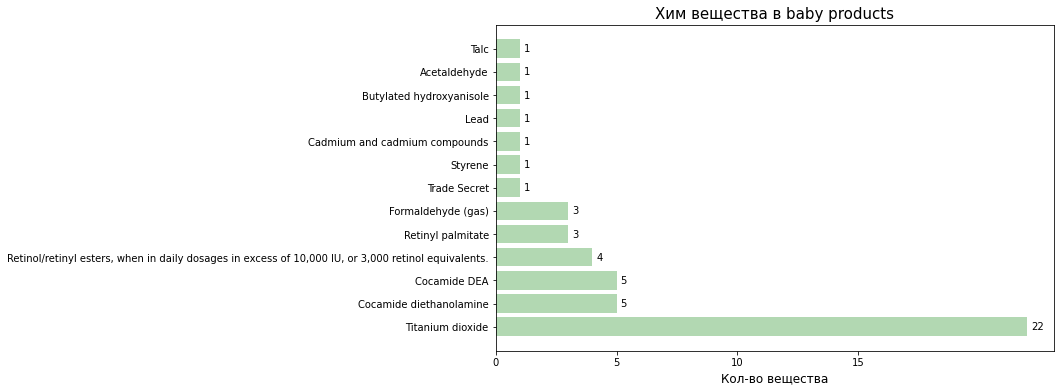

In [51]:
baby_prod = data.loc[data['PrimaryCategory']=='Baby Products']
baby_prod_chem = baby_prod['ChemicalName'].value_counts()

fig = plt.figure(figsize=(10, 6))
ax = plt.subplot()
ax.barh(baby_prod_chem.index, baby_prod_chem.values, color='green', alpha=0.3)

for x,y in zip(baby_prod_chem.values,baby_prod_chem.index):
    ax.annotate(x, (x,y), textcoords="offset points", xytext=(4,0), va='center') 

ax.set_title('Хим вещества в baby products', fontsize=15)
ax.set_xlabel('Кол-во вещества', fontsize=12)
ax.set_xticks(np.arange(0,18,5))

plt.show()

По графику видно, что в детских продуктах преобладает хим.вещество titanium dioxide.

Следующий грфик будет отображать соотношение содержания хим.веществ во всех продуктах.

<Figure size 1440x1080 with 0 Axes>

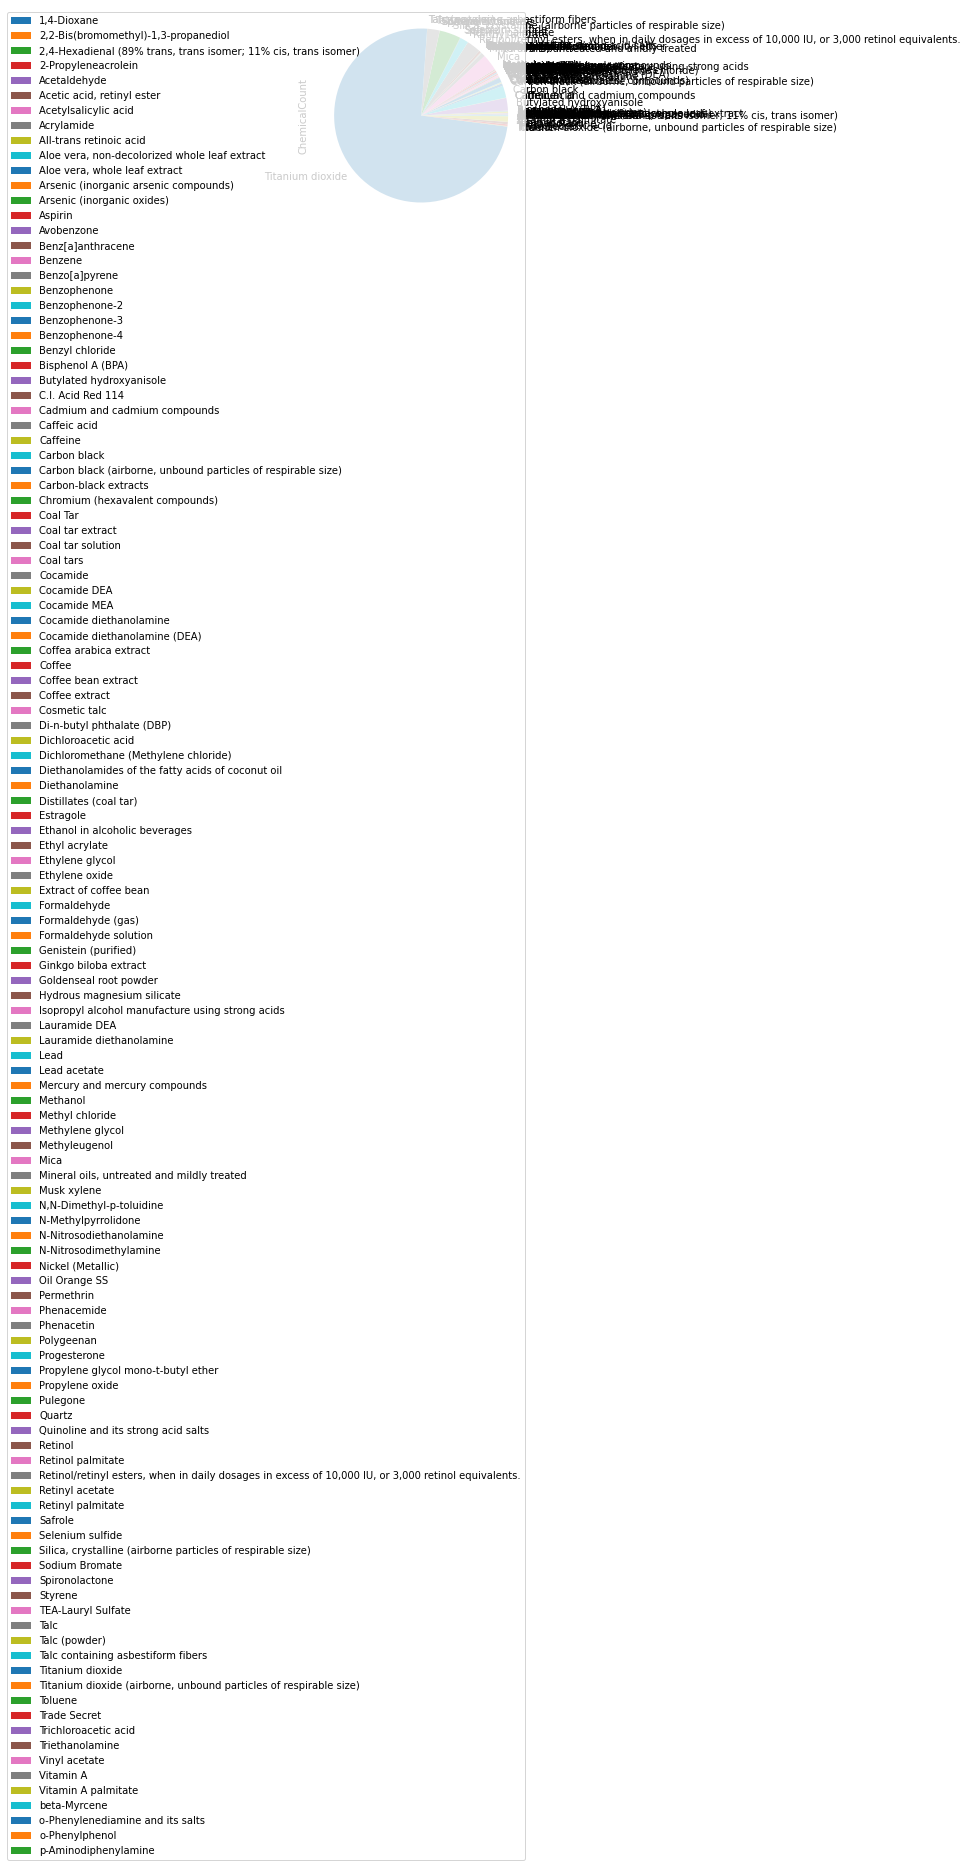

In [ ]:
plt.figure(figsize = (20,15))
data.groupby(['ChemicalName']).sum().plot(kind='pie', y='ChemicalCount')

По графику видно, что в продуктах преобладает содержание диоксида титана. Остальных веществ относительно мало.

Еще один способ показать соотношение:

Text(0.5, 1.0, 'Chemical products')

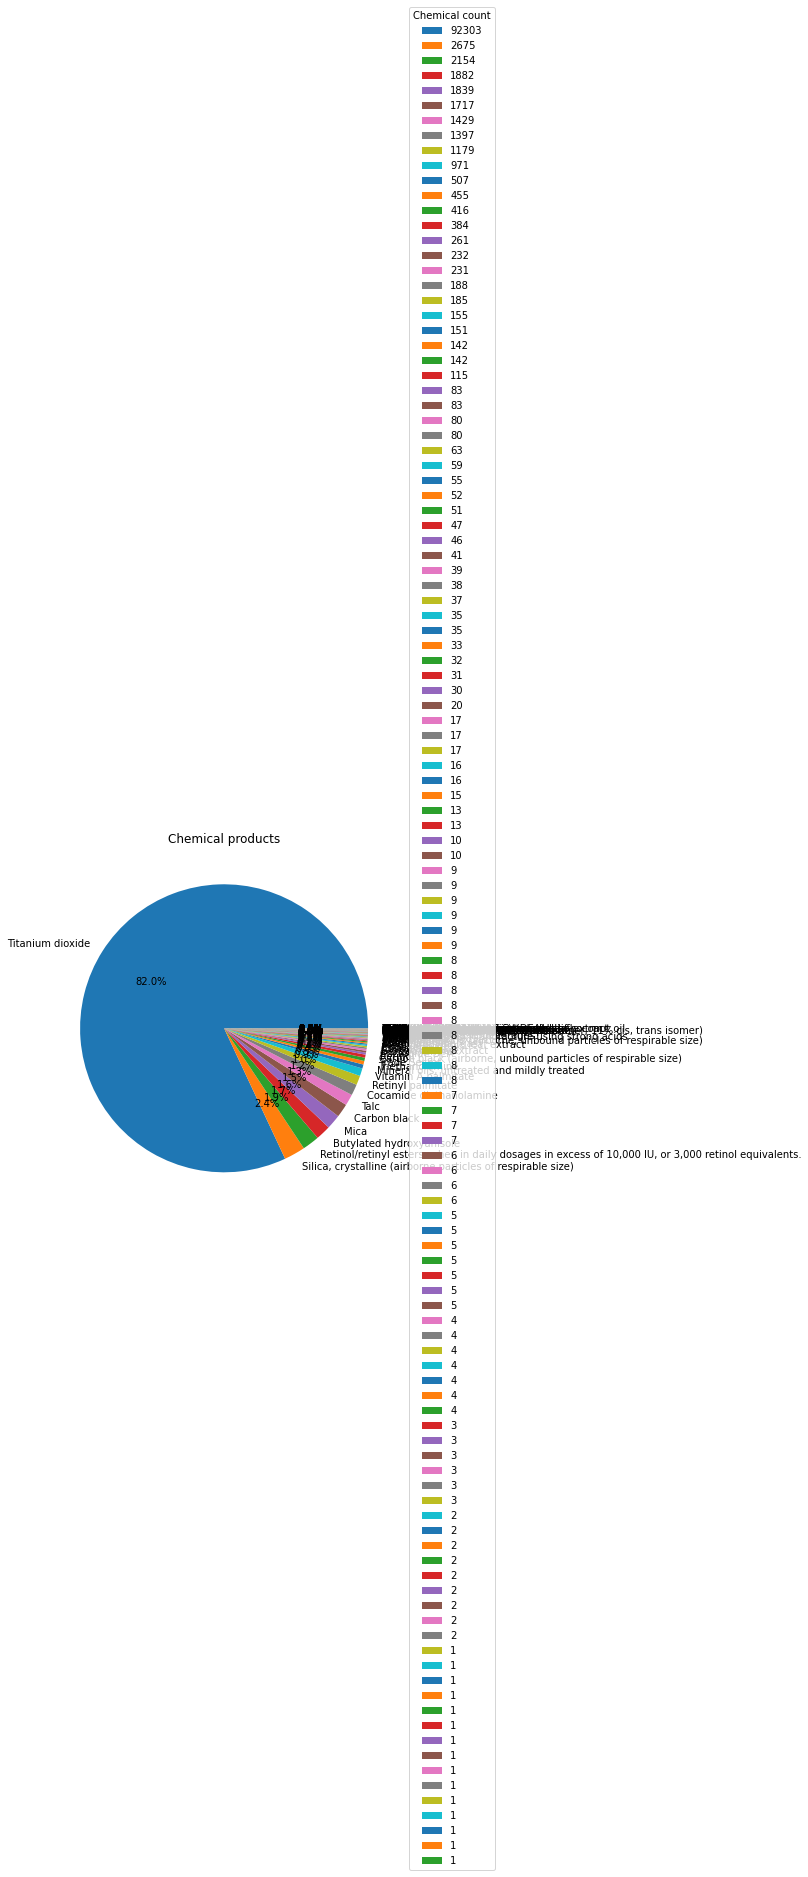

In [80]:
data2 = data['ChemicalName'].value_counts()
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    data2,
    labels=data2.index,
    autopct='%.1f%%'    
)
axes.legend(data2,
            title = 'Chemical count',
            loc = 'center left',
            bbox_to_anchor=(1, 0, 0.5, 1.5))

axes.set_title('Chemical products')

По графику можно увидеть не только визуальное соотношение, но и посмотреть конкретное количество содержания вещества в продуктах.

Следующий график отображает количество продуктов Lip Gloss в компаниях.

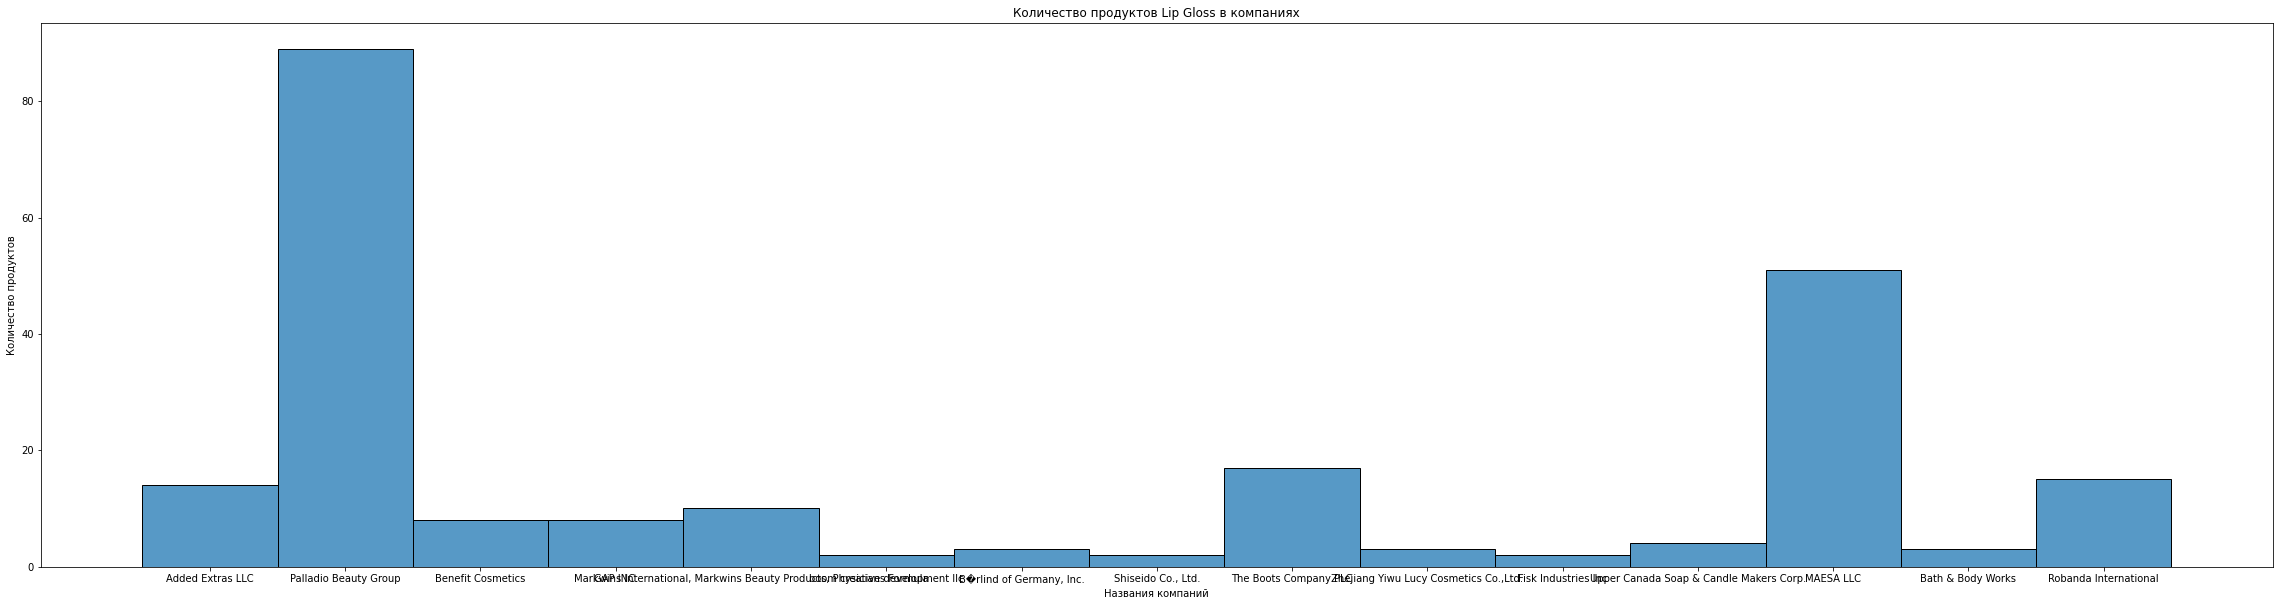

In [49]:
fig, axes = plt.subplots(figsize=(40, 10))

prod = data.loc[data['ProductName']=='Lip Gloss']
axes = sns.histplot(data=prod, x=prod['CompanyName'], palette='Pastel1')

axes.set(title = 'Количество продуктов Lip Gloss в компаниях', xlabel='Названия компаний', ylabel='Количество продуктов')
plt.show()

По графику видно, что количество продуктов Lip Gloss преобладает в двух компаниях: Palladio Beauty Group и MAESA LLC.

След.график: соотношение колониестимулирующего фактора(CSF) и количества хим.веществ.

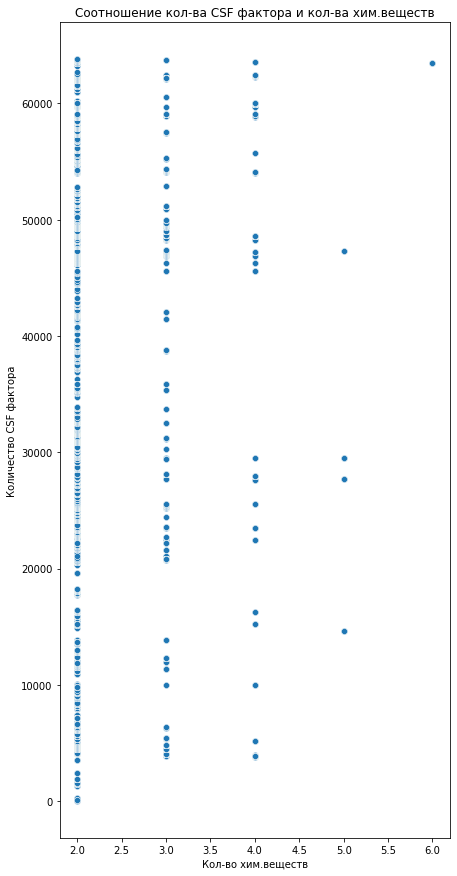

In [75]:
fig = plt.figure(figsize=(7, 15))

prod = data.loc[data['CSFId']!=""]
prod = prod.loc[prod['ChemicalCount']>1]
scatterplot = sns.scatterplot(
    data=prod,
    x='ChemicalCount',
    y='CSFId'
)
scatterplot.set(title = 'Соотношение кол-ва CSF фактора и кол-ва хим.веществ', xlabel='Кол-во хим.веществ', ylabel='Количество CSF фактора')
plt.show()

По графику видно, что больше всего CSF фактора содержится в продуктах с двумя хим.веществами.